<a href="https://colab.research.google.com/github/vvamsi91/IML_AS1/blob/main/DEPCNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
dataset = pd.read_csv("/content/sample_data/D3.csv")
# Separates columns into individual arrays

In [153]:
X1 = dataset.values[:,0]
X2 = dataset.values[:,1]
X3 = dataset.values[:,2]
Y = dataset.values[:,3]
m = len(X1) #dim of data column


In [154]:
X0 = np.ones((m,1)) #creates X0 filled with 1s
X1 = X1.reshape(m,1) #transposes explanatory columns
X2 = X2.reshape(m,1)
X3 = X3.reshape(m,1)
Y = Y.reshape(m,1)


In [155]:
def find_loss(X, Y, theta):
    m = Y.shape[0]
    h = X @ theta
    error = h - Y
    J = (1 / (2 * m)) * np.sum(error ** 2)
    return J



In [156]:
def find_linear_regression(X, Y, theta, alpha, iterations):
    m = Y.shape[0]
    loss_history = np.zeros(iterations)
    for i in range(iterations):
        h = X @ theta
        error = h - Y
        dj_dtheta = (1 / m) * X.T @ error
        theta = theta - alpha * dj_dtheta
        loss_history[i] = find_loss(X, Y, theta)
    return theta, loss_history

In [157]:
iterations = 3000
alpha = 0.01
X = np.column_stack((X0, X1))
theta = np.zeros((2, 1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta for X1:', theta[1])
print('Theta for X0 (bias):', theta[0])

Theta for X1: [-2.03541173]
Theta for X0 (bias): [5.92043383]


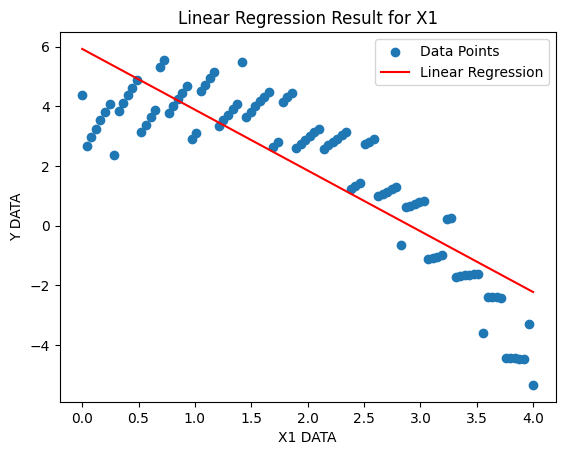

In [158]:
plt.scatter(X1, Y, label='Data Points')
plt.plot(X1, X @ theta, color='red', label='Linear Regression')
plt.xlabel('X1 DATA')
plt.ylabel('Y DATA')
plt.title('Linear Regression Result for X1')
plt.legend()

[5.48226715 5.44290965 5.40604087 ... 0.98500035 0.98500032 0.98500029]


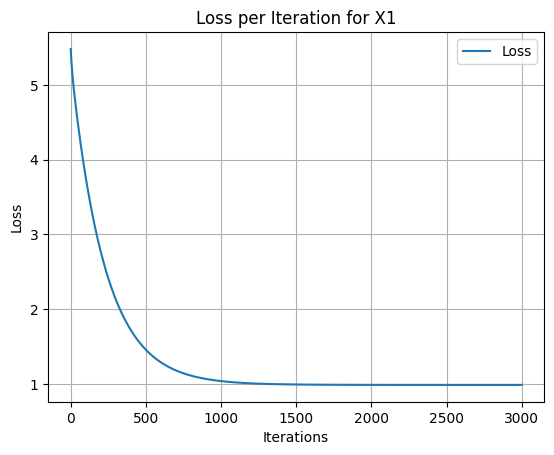

In [159]:
plt.plot(range(iterations), loss_history, label='Loss')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration for X1')
plt.legend()
print(loss_history)

In [160]:
iterations = 3000
alpha = 0.01
X = np.column_stack((X0, X2))
theta = np.zeros((2, 1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta for X2:', theta[1])
print('Theta for X0 (bias):', theta[0])

Theta for X2: [0.55783354]
Theta for X0 (bias): [0.73547995]


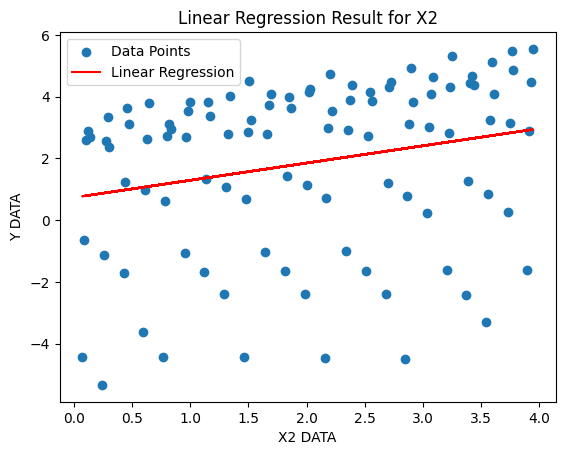

In [161]:
plt.scatter(X2, Y, label='Data Points')
plt.plot(X2, X @ theta, color='red', label='Linear Regression')
plt.xlabel('X2 DATA')
plt.ylabel('Y DATA')
plt.title('Linear Regression Result for X2')
plt.legend()

[5.29831663 5.09909109 4.92356115 ... 3.59936606 3.59936606 3.59936606]


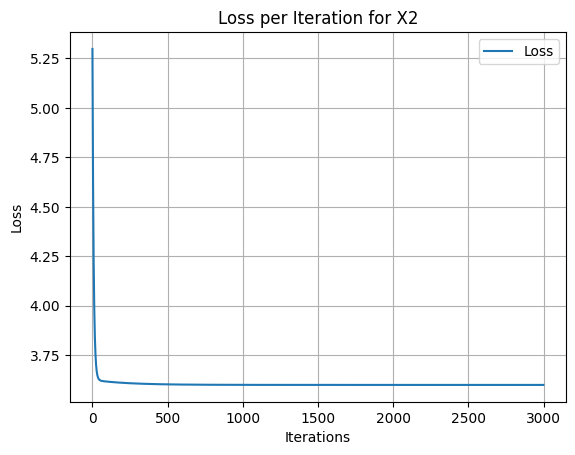

In [162]:
plt.plot(range(iterations), loss_history, label='Loss')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration for X2')
plt.legend()
print(loss_history)

In [163]:
iterations = 3000
alpha = 0.01
X = np.hstack((X0,X3))
theta = np.zeros((2,1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta X3 =', theta)

Theta X3 = [[ 2.86831421]
 [-0.51925373]]


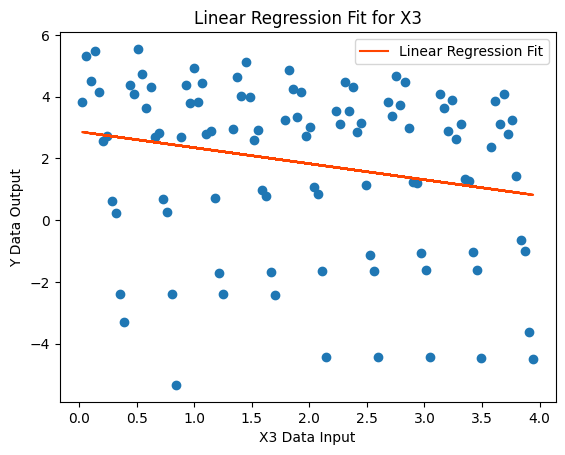

In [164]:
plt.scatter(X3, Y)
plt.plot(X3, X.dot(theta), color = 'orangered', label = 'Linear Regression Fit')
plt.xlabel('X3 Data Input')
plt.ylabel('Y Data Output')
plt.title('Linear Regression Fit for X3')
plt.legend()
plt.show()

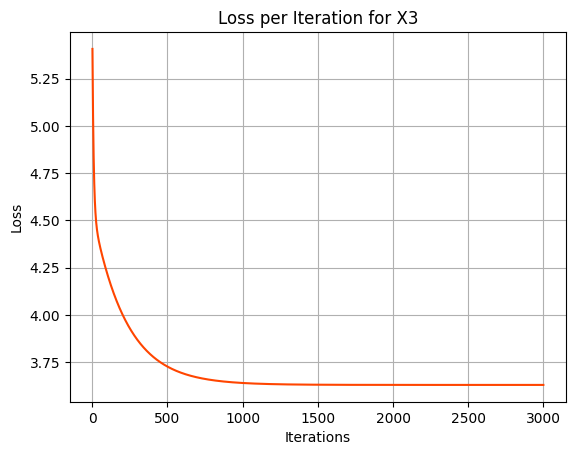

[5.40768785 5.30397076 5.21178297 ... 3.62945239 3.62945239 3.62945238]


In [165]:
plt.plot(range(1, iterations + 1), loss_history, color='orangered')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration for X3')
plt.show()
print(loss_history)

In [167]:
iterations = 5000
alpha = 0.01
X = np.hstack((X0,X1,X2,X3))
theta = np.ones((4,1)) * 0.5

In [168]:
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Final theta for X_all:', theta)
print('Final loss:', loss_history[-1])

Final theta for X_all: [[ 5.28046548]
 [-1.99895835]
 [ 0.53813233]
 [-0.26066188]]
Final loss: 0.7385247436084339


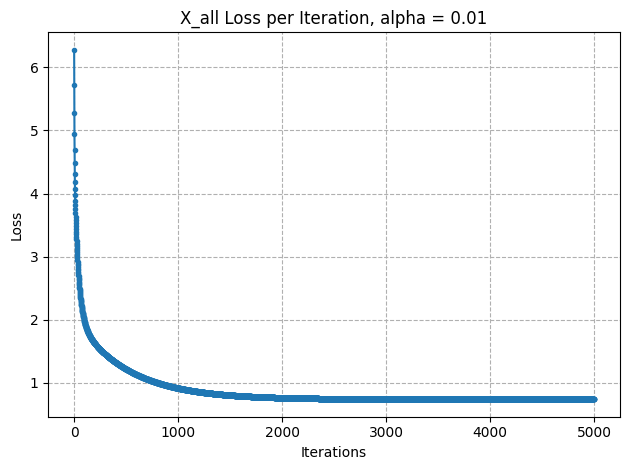

In [169]:
plt.plot(range(1, iterations + 1), loss_history, marker='o', markersize=3)
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X_all Loss per Iteration, alpha = 0.01')
plt.tight_layout()
X_test = np.array([[1,1,1,1], [1,2,0,4], [1,3,2,1]])
predictions = X_test.dot(theta)

In [170]:
for i, prediction in enumerate(predictions):
  print(f'Prediction {i+1} ({X_test[i,1:]}) = {prediction}')

Prediction 1 ([1 1 1]) = [3.55897758]
Prediction 2 ([2 0 4]) = [0.23990126]
Prediction 3 ([3 2 1]) = [0.09919322]


In [183]:
iterations = 100
alpha = 0.4
X = np.hstack((X0,X1,X2,X3))
theta = np.ones((4,1)) * 0.5

In [184]:
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Final theta for X_all:', theta)
print('Final loss:', loss_history[-1])

Final theta for X_all: [[1.13428553e+66]
 [2.53802430e+66]
 [2.49776824e+66]
 [2.47651561e+66]]
Final loss: 1.4229449145132151e+134


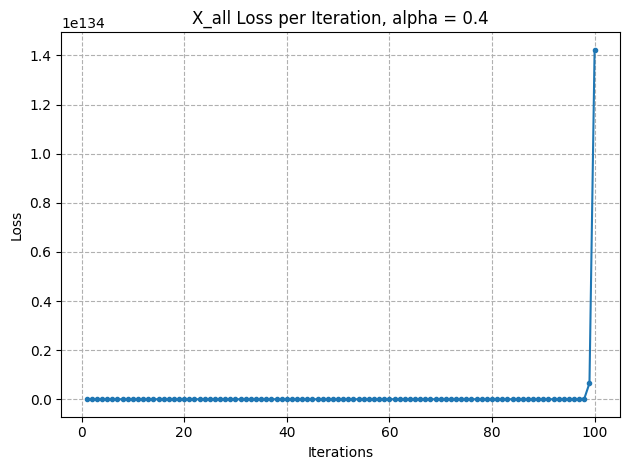

In [187]:

plt.plot(range(1, iterations + 1), loss_history, marker='o', markersize=3)
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X_all Loss per Iteration, alpha = 0.4')
plt.tight_layout()
X_test = np.array([[1,1,1,1], [1,2,0,4], [1,3,2,1]])
predictions = X_test.dot(theta)

In [186]:
for i, prediction in enumerate(predictions):
  print(f'Prediction {i+1} ({X_test[i,1:]}) = {prediction}')

Prediction 1 ([1 1 1]) = [8.64659367e+66]
Prediction 2 ([2 0 4]) = [1.61163966e+67]
Prediction 3 ([3 2 1]) = [1.62204105e+67]
